# Project: Exploratory Data Analysis on Seattle Airbnb Data
### Project Due on 28th November, 11:30 pm EST

#### Context
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

#### Content
The following Airbnb data is included in this Seattle dataset:
- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day

**To get the dataset click [here](https://georgiancollege-my.sharepoint.com/:f:/g/personal/katie_tiwari_georgiancollege_ca/Eh6hG8jQX_FBvU_pk5R5wZwB_xn5gS2eBE1vWQ_DmaH1kQ?e=evqomn)**

#### Inspiration for questions
- Can you describe the vibe of each Seattle neighborhood using listing descriptions?
  - What are the busiest times of the year to visit Seattle? By how much do prices spike?
- Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?

#### **Note:** Don't discuss the results, limitations, conclusion, reasons as comment in the code cell. Use separate markdown cells instead. If you are not familier with markdown, refer this [link here](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook). Only add code related comments as comment in the code cell. Also Make sure to add comments in the code.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this section of the report, provide a brief introduction to the dataset you've selected for analysis. 

- Create atleast three complex and meaningful questions(refer inspiration questions to get an idea), then address those questions in the rest of the analysis. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.
- **Include the 3 research questions here**



#### Business and Data Understanding

USA is considered as one of the most expensive countries to live in, however the cost of living and trip to USA is justifiable in terms of expenses. Top cities of United States offer exceptional opportunities in terms of employment and business, Seattle being one of those cities. Seattle is one of the 10 most expensive cities of USA based on the cost of living. 

Travelers would undoubtedly incur significant expenses if they choose to visit Seattle. Could Seattle Airbnb be the best option given the increased desire for more individualised stays and the escalating competition in the travel and hotel sectors? With the help of below-mentioned datasets, let's uncover some straightforward yet intriguing conclusions!

We have following datasets for data analysis to take data-driven decisions.

- **Listings**- contains all the information about Airbnb listings in **3818 rows and 92 columns**. The listings are identified using the ‘id’.


- **Calendar**- There are 365 recordings for each Airbnb listing in this booking diary for the period of January 2016 to January 2017, having **13,93,570 rows and 4 columns**. Each listing ID has 365 days' worth of data, including the day's availability and booking cost. If the property is already reserved, the booking cost is not stated.


- **Reviews**- contains reviews regarding the listings from different reviewers, having **84,849 rows and 6 columns**.

These datasets seem to unfold various insights and findings, impacting the business and tourism industry of Seattle. We will primarily focus on 3 main research questions mentioned below by applying EDA (Exploratory Data Analysis). 

**Research Questions**

- **Q1. What are the variation in price, price per accommodation, number of listings in Seattle Neighbourhoods??**


- **Q2. How much discount should you expect from an owner if you rent a house for a week?**


- **Q3. Is there any trend in availability and price throughout the year?**


- **Bonus : What are the optimal features that are driving the property prices? And can we predict the price using those features? (Multivariate Analysis)**

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, you will load in the data, check for cleanliness, merging multiple files, printing some rows of the data in output, handling missing values, duplicat values, outliers etc. and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and privde the reasoning for every decision taken.

In [1]:
#Importing important and required libraries for the analysis

from functools import partial# import packages and set  plot to be embedded
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from functools import partial
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

# To display all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_colwidth', -1)

In [2]:
# Loading all datasets

listings = pd.read_csv("listings.csv")
calendar = pd.read_csv("calendar.csv")
reviews = pd.read_csv("reviews.csv")

As datasets have been loaded, we will walk through all of them and try to detect anomalies, and if we find any, we will try to eliminate them by taking appropriate actions.

#### Displaying results from listings dataset.

In [3]:
#Loading first five rows of the listings dataset.

listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no","Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no",none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/cfe47d69_original.jpg?interpolation=lanczos-none&size=large_cover&output-format=jpg&output-quality=70,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a small landscape business. My life revolves around beauty wherever I find it or create it. I grew up in Seattle and love this city for the people, it's natural beauty and don't know anywhere 

In [4]:
#Displaying the number of rows and columns listings dataset has

print('Listings dataset has %d rows and %d columns.\n' %listings.shape)

Listings dataset has 3818 rows and 92 columns.



In [5]:
#Displaying the basic information about the dataset to get familiar with it. 

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

There are multiple columns which contains null values and have different datatypes, however all of them will not be useful for our analysis, therefore, we will deal with them in the data cleaning part. 

In [6]:
#Displaying the sum of missing values in different columns.

listings.isnull().sum()

id                                  0   
listing_url                         0   
scrape_id                           0   
last_scraped                        0   
name                                0   
summary                             177 
space                               569 
description                         0   
experiences_offered                 0   
neighborhood_overview               1032
notes                               1606
transit                             934 
thumbnail_url                       320 
medium_url                          320 
picture_url                         0   
xl_picture_url                      320 
host_id                             0   
host_url                            0   
host_name                           2   
host_since                          2   
host_location                       8   
host_about                          859 
host_response_time                  523 
host_response_rate                  523 
host_acceptance_

#### Displaying results from calendar dataset.

In [7]:
#Loading first five rows of the calendar dataset.

calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [8]:
#Displaying the number of rows and columns calendar dataset has

print('Calendar dataset has %d rows and %d columns.\n' %calendar.shape)

Calendar dataset has 1393570 rows and 4 columns.



In [9]:
#Displaying the basic information about the dataset to get familiar with it. 

calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


Only the price column seems to have null values, that might give some information, let's explore why some of the price is not listed.

Note: We will fix the datatypes in data cleaning stage.

In [10]:
#counting how many listings are available. 

calendar['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [11]:
#Counting how many values are missing in the price. 

calendar['price'].isnull().sum()

459028

Results seem obvious and we can assume from the result that price has not been listed for the unavailable listings. The dataset only displays the price of the listings if it is available on particular date.

#### Displaying results from reviews dataset.

In [12]:
#Loading first five rows of the reviews dataset.

reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!
1,7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\r\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay."
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had!\r\n\r\nDidn't really get to meet Kelly until I was on my out, but she was always readily available by phone. \r\n\r\nI believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday"
3,7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to."
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. \r\n\r\nThe apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!


In [13]:
#Displaying the number of rows and columns reviews dataset has

print('Reviews dataset has %d rows and %d columns.\n' %reviews.shape)

Reviews dataset has 84849 rows and 6 columns.



In [14]:
#Displaying the basic information about the dataset to get familiar with it. 

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


Only the comments column seems to have null values which is less in numbers compared to the dataset, therefore can be ignored.

Note: We will fix the datatypes in data cleaning stage.

### Data Cleaning

> In this segment of the report, We will remove unnecessary data, handle null values, impute appropriate values, and change the data type if needed

- In order to go back and forth when needed, we will copy the dataset and will store in different dataframe.

In [15]:
# creating duplicate dataframes.

lis = listings.copy()
cal = calendar.copy()
rev = reviews.copy()

#### Handling the listings dataset.

In [16]:
# Dropping columns that are not relevant to our analyse.

col = ['summary','name','space','description','experiences_offered','neighborhood_overview','notes','transit', \
       'thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_about','host_thumbnail_url',\
       'host_picture_url','street', 'neighbourhood', 'neighbourhood_cleansed',\
       'square_feet', 'calendar_updated','requires_license',\
       'first_review','last_review','host_name','host_location']

lis.drop(col, axis =1, inplace=True)

print('We dropped %d columns' %len(col))

We dropped 26 columns


In [17]:
# Renaming columns

col = {'market': 'city',
       'extra_people' : 'extra_people_price'}
lis.rename(columns=col, inplace=True)

Looking at the dataset, we can notice that the dataset contains 4 price columns: 'price', 'extra_people_price', 'cleaning_fee', and 'security_deposit'. They all have $ sign before their values that needs to be stripped off because we want to analyse price as a number. Therefore removing the dollar sign from all the values of price columns. We will also change the datatype from object to float for our analysis.

In [18]:
def convert_price_to_number(s):
    try:
        return float(s.replace('$','').replace(',', ''))
    except:
        return s

In [19]:
for col in lis.select_dtypes(include='object').columns:  
    lis[col] = lis[col].apply(convert_price_to_number)

In [20]:
#Replacing NaN in cleaning_fee with zero, assuming cleaning_fee of that particular listing is zero.

lis['cleaning_fee'] = lis['cleaning_fee'].fillna('0')

We will not use the amount of security deposit in our analysis, instead we will use it as category whether the security deposity has been paid or not.

In [21]:
# Creating new column 
lis['security_deposit_Y/N'] = np.where(lis.security_deposit.isnull(), 0, 1)
lis[['security_deposit_Y/N','security_deposit']]

#Dropping the original column security_deposit
lis.drop('security_deposit', axis=1, inplace=True)

Host response rate and acceptance rate are in the percentage but for our analysis, we want to treat as integer, therefore we need to remove the percentage sign from its values and need to change the datatype from object to integer.

Note: We will assume that the host did not get rating for the listings whose values are missing.

In [22]:
# Stripping off % sign from 'host_response_rate', and 'host_acceptance_rate'

lis['host_response_rate'] = lis['host_response_rate'].str[:-1]
lis['host_acceptance_rate'] = lis['host_acceptance_rate'].str[:-1]

In [23]:
# Replacing null values with 0 (assuming these hosts didn't get rating)

lis['host_response_rate'] = lis['host_response_rate'].fillna('0')
lis['host_acceptance_rate'] = lis['host_acceptance_rate'].fillna('0')

In [24]:
# Converting data type

lis['host_response_rate'].astype(int)
lis['host_acceptance_rate'].astype(int)

0       100
1       100
2       100
3       0  
4       0  
5       0  
6       100
7       100
8       100
9       100
10      100
11      100
12      100
13      100
14      100
15      100
16      100
17      100
18      0  
19      0  
20      100
21      100
22      100
23      0  
24      0  
25      100
26      100
27      100
28      100
29      100
30      100
31      100
32      100
33      100
34      100
35      100
36      0  
37      100
38      100
39      100
40      100
41      100
42      0  
43      100
44      100
45      100
46      100
47      100
48      0  
49      100
50      100
51      100
52      0  
53      0  
54      100
55      100
56      100
57      100
58      0  
59      100
60      0  
61      100
62      100
63      100
64      100
65      100
66      100
67      100
68      100
69      0  
70      0  
71      100
72      100
73      100
74      100
75      100
76      100
77      100
78      100
79      100
80      100
81      100
82      100
83  

Handling all the missing values by imputing zero.

In [25]:
num_col = lis.select_dtypes(include=['float', 'int']).copy().columns

for col in num_col:
    lis.update(lis[col].fillna(0))

Number of amenities and verifications provided in the listing can affect pricing therefore, counting them and storing in seperate columns.

In [26]:
lis['number_of_amenities'] = lis['amenities'].apply(lambda col: col.count(',')+1)

lis['number_of_verifications'] = lis['host_verifications'].apply(lambda col: col.count(',')+1)

We want to use the host_since column for our analysis, however we only want to use the year host exists from, therefore calculating active years of the host.

In [27]:
# Creating new column: 'Number of years host has been exist for'

lis['host_since'] = pd.to_datetime(lis['host_since'])
lis['host_active_years'] = round((pd.datetime.now() - lis['host_since']).dt.days / 365,1)
lis.drop('host_since', axis=1, inplace=True)

In [28]:
#Encoding true, false as 0 and 1

TF_encoding = {'f': 0, 't': 1}
cols = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','has_availability', \
'instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
lis[cols] = lis[cols].apply(lambda x: x.map(TF_encoding))

In [29]:
# Create dummy variable for a few categorical columns
categorical_columns = ['host_response_time', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']
for col in categorical_columns:
    lis = pd.concat([lis,
                     pd.get_dummies(lis[col], prefix=col, prefix_sep='_', drop_first=True)],
                    axis=1)

In [30]:
#Dropping null values from the host_profile_picture

lis.dropna(subset=['host_has_profile_pic'], inplace=True)

Imputing some value in the null values of zipcode, and fixing the zipcode which has more than 5 characters.

In [31]:
lis.update(lis['zipcode'].fillna('99999'))

lis.update(lis[lis['zipcode'].str.len()>5]['zipcode'].str[3:])

In [32]:
lis['zipcode']=lis['zipcode'].astype(object)

#### Handling the Calender Dataset

In [33]:
#fixing the datatype of date column

cal['date'] = pd.to_datetime(cal['date'])

The $ sign before price column should be stripped off since we want to use price as number in our analysis.

In [34]:
for col in cal.select_dtypes(include='object').columns:  
    cal[col] = cal[col].apply(convert_price_to_number)

Imputing any value in price column might impact some useful analysis and can misguide the information, therefore removing them seems better option.

In [35]:
cal.dropna(subset=['price'], inplace=True)

In [36]:
#Extracting month from date and storing it in a new column for future analysis.
cal['month'] = pd.DatetimeIndex(cal['date']).month

#### Handling the reviews dataset

In this dataset, most important column is comments, and if any values are null in that column, that data will not be of any use. Moreover, imputation cannot be done either, therefore removing all the null values from the comment column.

In [37]:
rev.dropna(subset=['comments'], inplace=True)

In [38]:
#changing the datatype of date column

rev['date'] = pd.to_datetime(rev['date'])

In [39]:
#Extracting month from date and storing it in a new column for future analysis.
rev['month'] = pd.DatetimeIndex(rev['date']).month

### Validating all the changes that we have done so far.

In [40]:
lis.head()

,id,listing_url,scrape_id,last_scraped,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,city,state,zipcode,city,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,cleaning_fee,guests_included,extra_people_price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,security_deposit_Y/N,number_of_amenities,number_of_verifications,host_active_years,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,956883,within a few hours,96,100,0.0,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",1.0,1.0,Queen Anne,Seattle,WA,98119.0,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer}",85.0,0.0,0.0,0,2,5.0,1,365,1,14,41,71,346,2016-01-04,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0.0,WASHINGTON,0,moderate,0,0,2,4.07,0,10,4,11.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,5177328,within an hour,98,100,1.0,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 'reviews', 'jumio']",1.0,1.0,Queen Anne,Seattle,WA,98119.0,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free Parking on Premises"",""Buzzer/Wireless Intercom"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Safety Card"",""Fire Extinguisher"",Essentials}",150.0,1000.0,3000.0,40.0,1,0.0,2,90,1,13,13,16,291,2016-01-04,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,WASHINGTON,0,strict,1,1,6,1.48,1,16,6,9.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,16708587,within a few hours,67,100,0.0,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1.0,1.0,Queen Anne,Seattle,WA,98119.0,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,1,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,""Free Parking on Premises"",""Pets Allowed"",""Pets live on this property"",Dog(s),Cat(s),""Hot Tub"",""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",Essentials,Shampoo}",975.0,0.0,0.0,300.0,10,25.0,4,30,1,1,6,17,220,2016-01-04,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,WASHINGTON,0,strict,0,0,2,1.15,1,21,5,8.5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,7421966,ht

In [41]:
lis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 0 to 3817
Data columns (total 94 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     3816 non-null   int64  
 1   listing_url                            3816 non-null   object 
 2   scrape_id                              3816 non-null   int64  
 3   last_scraped                           3816 non-null   object 
 4   host_id                                3816 non-null   int64  
 5   host_response_time                     3295 non-null   object 
 6   host_response_rate                     3816 non-null   object 
 7   host_acceptance_rate                   3816 non-null   object 
 8   host_is_superhost                      3816 non-null   float64
 9   host_neighbourhood                     3518 non-null   object 
 10  host_listings_count                    3816 non-null   float64
 11  host

In [42]:
cal.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
9,241032,2016-01-13,t,85.0,1
10,241032,2016-01-14,t,85.0,1
14,241032,2016-01-18,t,85.0,1


In [43]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   available   934542 non-null  object        
 3   price       934542 non-null  float64       
 4   month       934542 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 42.8+ MB


In [44]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,month
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!,7
1,7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\r\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay.",7
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had!\r\n\r\nDidn't really get to meet Kelly until I was on my out, but she was always readily available by phone. \r\n\r\nI believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday",7
3,7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to.",8
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. \r\n\r\nThe apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!,8


In [45]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     84831 non-null  int64         
 1   id             84831 non-null  int64         
 2   date           84831 non-null  datetime64[ns]
 3   reviewer_id    84831 non-null  int64         
 4   reviewer_name  84831 non-null  object        
 5   comments       84831 non-null  object        
 6   month          84831 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 5.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> Now you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. Look at one variable at a time, and then follow it up by looking at relationships between variables.

- The EDA should include both single-variable (1d) and multiple-variable (2d) explorations. 
- The project's visualizations should be varied and show multiple comparisons and trends. At least three kinds of plots(eg. histogram, box plot, line plot, bar plot, etc) should be created as part of the explorations.
- Please make sure reasoning is provided for each analysis decision, plot, and statistical summary.
- Visualizations made in the notebook, should depict the data in an appropriate manner (i.e., has appropriate axis labels, scale, legends, and title) that allows plots to be readily interpreted.

### Research Question 1: Is there any variation in price, price per accommodation, number of listings in Seattle Neighbourhoods?


The price of the accommodation in seattle depends upon so many factors, location being one of the crucial factor to consider. Other features we can consider are number of rooms, number of bathrooms, property type, amenities, neighbourhood, reviews received from customers, services the listing provides, and so on. We will use different features for our analysis and will try to find the variation in price, price per accommodation and number of listings in the neighbourhood.

Text(0.5, 0, 'Neighbourhood')

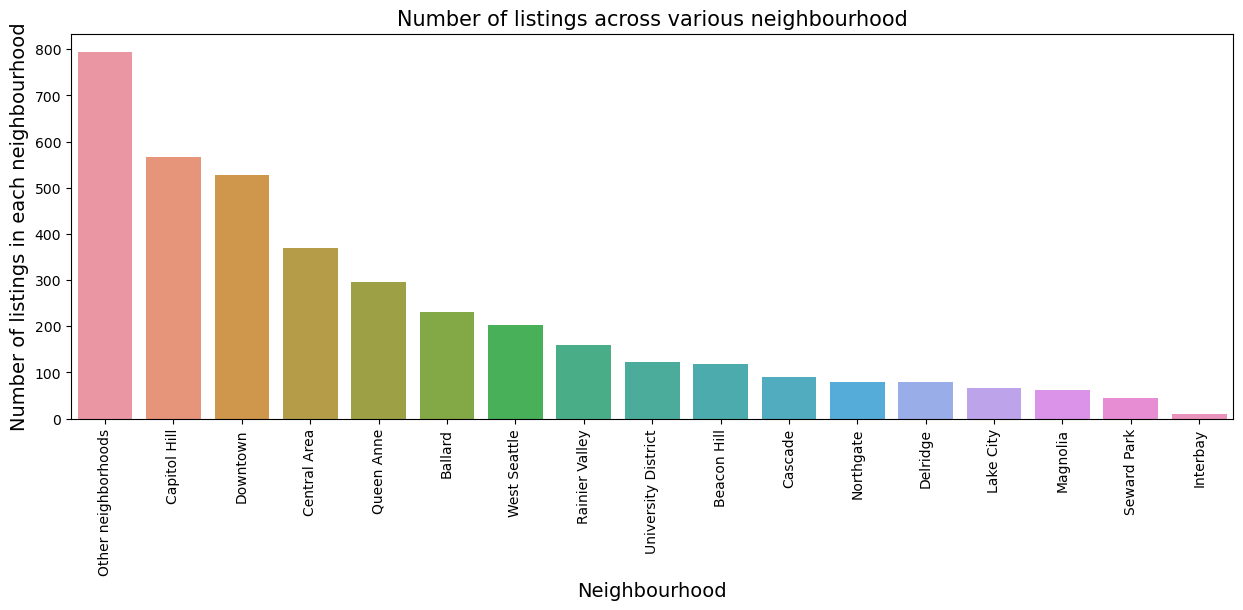

In [46]:
plt.figure(figsize = (15,5))
sns.barplot(x = lis['neighbourhood_group_cleansed'].value_counts().index,
            y = lis['neighbourhood_group_cleansed'].value_counts())
plt.ylabel('Number of listings in each neighbourhood', fontsize= 14)
plt.title('Number of listings across various neighbourhood', fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood', fontsize=14)

From the graph shown above, other than unknown neighbourhoods, Capitol Hill, Downtown, Central Area, Queen Anne, and Ballard are the top 5 neighbourhoods which have the most numbers of listings. To get a better view from geographical perspective, let's look at the map of seattle and distribution of listings across the Seattle city. For that we need to import few geological data of the Seattle city which can be retreived from this website: https://data-seattlecitygis.opendata.arcgis.com/datasets/city-clerk-neighborhoods/explore?location=47.614536%2C-122.336950%2C11.87

In [47]:
!pip install geopandas

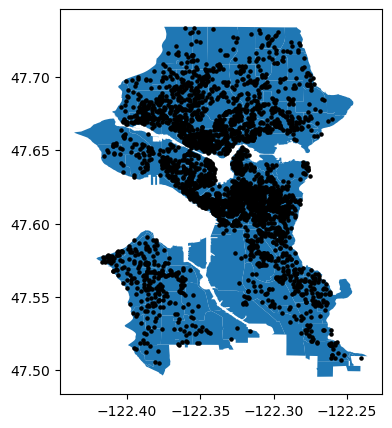

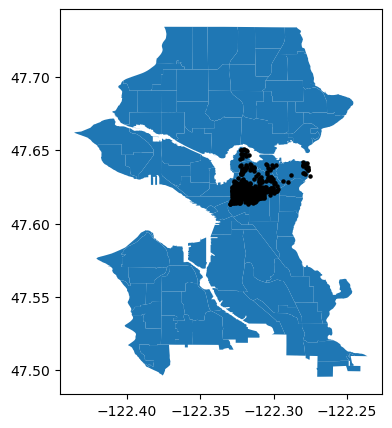

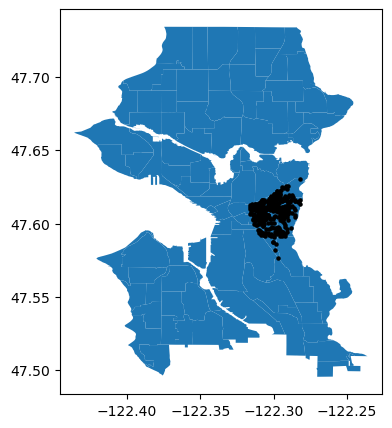

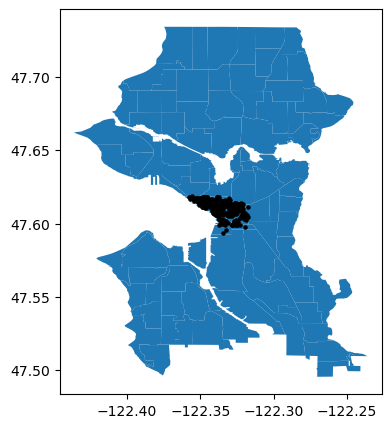

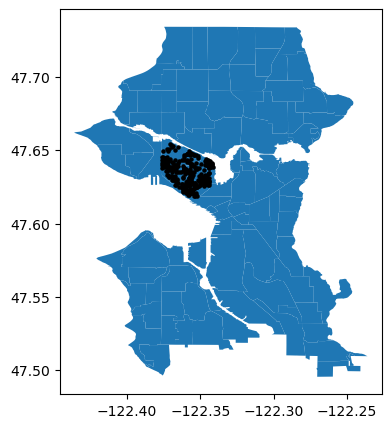

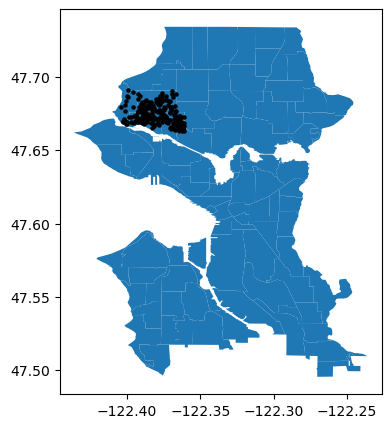

In [48]:
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame

seattle_map = lis.dropna(subset=['latitude', 'longitude'])

geometry = [Point(xy) for xy in zip(seattle_map['longitude'], seattle_map['latitude'])]
gdf = GeoDataFrame(seattle_map, geometry=geometry)

# load seattle shape
cities = gpd.read_file('City_Clerk_Neighborhoods.shp')
seattle = cities.loc[cities['L_HOOD'].isnull() == False]
seattle['L_HOOD'] = seattle['L_HOOD'].replace('NO BROADER TERM', 'OTHER NEIGHBORHOODS')
seattle_shp = seattle.loc[:, 'geometry']

gdf.plot(ax=seattle.plot(figsize=(18,5)), marker='o', color='black', markersize=5)

for i, n in enumerate(['Capitol Hill', 'Central Area', 'Downtown', 'Queen Anne', 'Ballard']):
    new_map = seattle_map[seattle_map['neighbourhood_group_cleansed'] == n]
    geometry = [Point(xy) for xy in zip(new_map['longitude'], new_map['latitude'])]
    gdf = GeoDataFrame(new_map, geometry=geometry)
    gdf.plot(ax=seattle.plot(figsize=(18,5), legend= True), 
             marker='o', color='black', markersize=5, facecolor = 'k')

As can be seen from these maps, the majority of the listings are located in Central Seattle, with "Capitol Hill," "Downtown," and "Central Area" having the highest concentration of listings.

#### Now checking the price per accommodation.

In [49]:
#Storing the price per accommodation values in seperate column.
lis['price_per_accomodation'] = lis['price']/ lis['accommodates']

listing_price = lis.groupby('neighbourhood_group_cleansed').mean()[['price', 'price_per_accomodation']]

In [50]:
listing_price

,price,price_per_accomodation
neighbourhood_group_cleansed,,
Ballard,124.682609,37.774156
Beacon Hill,94.669492,35.453571
Capitol Hill,130.592593,46.814611
Cascade,140.101124,48.767322
Central Area,128.338753,39.594547
Delridge,83.278481,31.179536
Downtown,154.329545,47.680455
Interbay,109.727273,50.772727
Lake City,92.671642,38.123010


**Plotting the barplot of the same for better visualisation.**

Text(0.5, 0, 'Neighbourhood')

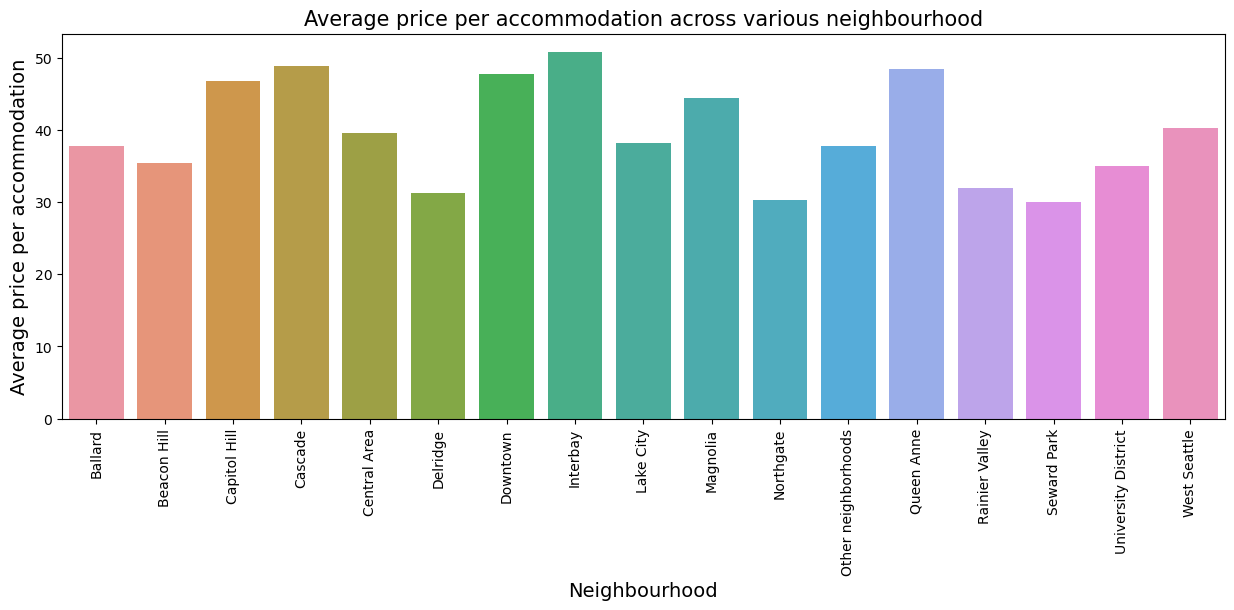

In [51]:
plt.figure(figsize=(15,5))
sns.barplot(x = listing_price.index,
            y = listing_price['price_per_accomodation'])
plt.ylabel('Average price per accommodation', fontsize= 14)
plt.title('Average price per accommodation across various neighbourhood', fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood', fontsize=14)

From the graph shown above, we can clearly infer that the average price per accommodation are comparatively higher in 'Capitol Hill', 'Cascade', 'Downtown', 'Interbay', and 'Queen Anne' than other neighbourhoods.

Most common property types own by AirBNB in USA are Apartment, Houses, and Townhouses, therefore we will analyse how they are distributed over different neighbourhood.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Ballard'),
  Text(1, 0, 'Beacon Hill'),
  Text(2, 0, 'Capitol Hill'),
  Text(3, 0, 'Cascade'),
  Text(4, 0, 'Central Area'),
  Text(5, 0, 'Delridge'),
  Text(6, 0, 'Downtown'),
  Text(7, 0, 'Interbay'),
  Text(8, 0, 'Lake City'),
  Text(9, 0, 'Magnolia'),
  Text(10, 0, 'Northgate'),
  Text(11, 0, 'Other neighborhoods'),
  Text(12, 0, 'Queen Anne'),
  Text(13, 0, 'Rainier Valley'),
  Text(14, 0, 'Seward Park'),
  Text(15, 0, 'University District'),
  Text(16, 0, 'West Seattle')])

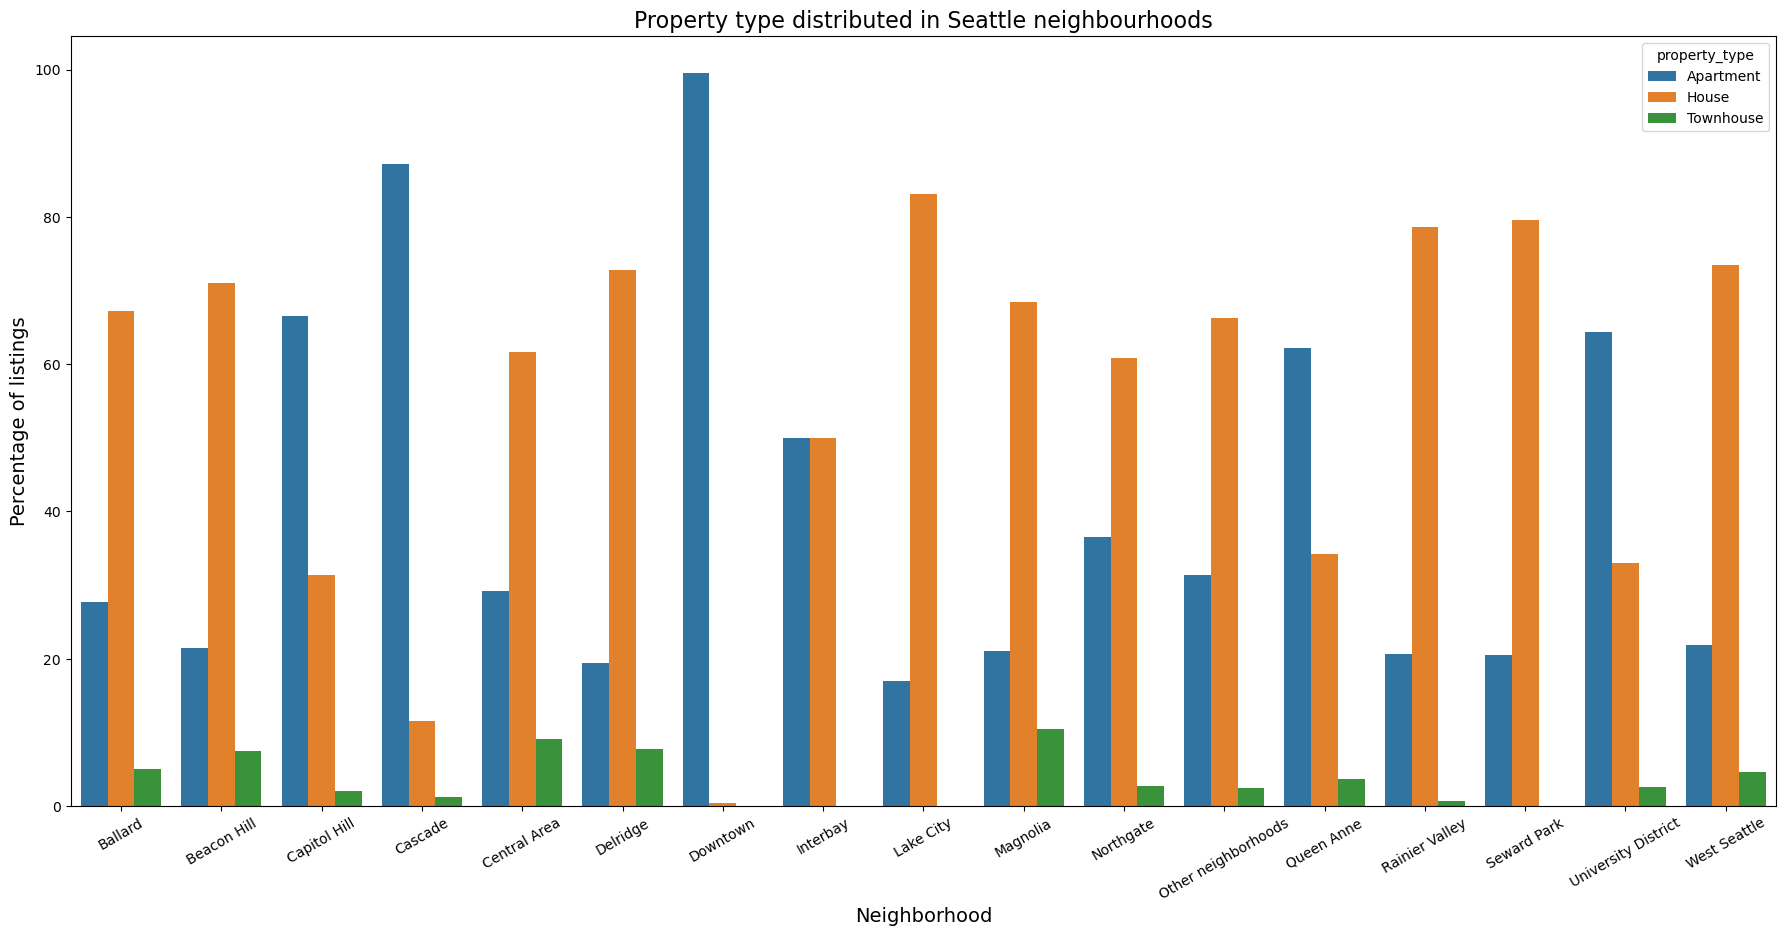

In [52]:
#filtering out common property types houses, apartments, and townhouses

neighborhood_property = (lis[lis['property_type'].isin(['Apartment', 'House', 'Townhouse'])]
                                .groupby(['neighbourhood_group_cleansed', 'property_type']).size())

### take the proportion of each property_type in a neighbourhood
neighborhood_property = (neighborhood_property.groupby(level = 0)
                         .apply(lambda x: 100 * x /float(x.sum()))
                        .reset_index())

### Plot the neighbourhoods and the proportion of listings in each property_type category
plt.figure(figsize = (22,10))
sns.barplot(x = 'neighbourhood_group_cleansed', y = 0, hue= 'property_type', data= neighborhood_property)
plt.title('Property type distributed in Seattle neighbourhoods', fontsize= 16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Percentage of listings', fontsize=14)
plt.xticks(rotation= 30)

In neighbourhoods which have the highest numbers of listings (Capitol Hills, Cascade, Downtown, Queen Anne, and Ballard), other than Ballard, every neighbourhood has Apartment as the highest available property type.

However, other neighbourhoods have propensity of possessing houses more than apartments and townhouses. 

Moreover, Townhouses are comparatively very low than apartments and houses.

We are storing neighbourhood, price, price per accommodation, number of listings, and most frequent property type

In [53]:
listing_price = pd.concat([listing_price, lis.groupby('neighbourhood_group_cleansed').size()], axis=1)

### get the most frequent property type in each neighborhood
listing_price= pd.concat([listing_price, lis.groupby('neighbourhood_group_cleansed')['property_type'].agg(pd.Series.mode)]
                          , axis=1)
## rename the columns
listing_price.rename(columns = {0: 'Number of Listings', 'property_type': 'most frequent property type'})

,price,price_per_accomodation,Number of Listings,most frequent property type
neighbourhood_group_cleansed,,,,
Ballard,124.682609,37.774156,230,House
Beacon Hill,94.669492,35.453571,118,House
Capitol Hill,130.592593,46.814611,567,Apartment
Cascade,140.101124,48.767322,89,Apartment
Central Area,128.338753,39.594547,369,House
Delridge,83.278481,31.179536,79,House
Downtown,154.329545,47.680455,528,Apartment
Interbay,109.727273,50.772727,11,"[Apartment, House]"
Lake City,92.671642,38.123010,67,House


#### More on Univariate analysis

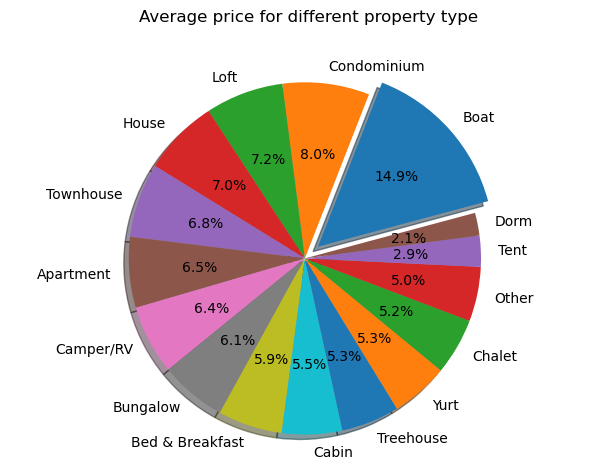

In [54]:
# Checking the average price for all property types
property_price = lis.groupby('property_type')['price'].mean().sort_values(ascending = False)

explode = (0.1, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0)  
fig1, ax1 = plt.subplots()
ax1.pie(property_price, explode=explode, labels=property_price.index, autopct='%1.1f%%',
        shadow=True, startangle=15)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Average price for different property type\n\n")
plt.tight_layout()
plt.show()

Boats are usually considered as the most luxurious place to lease, and here in Seattle, there is a same case. We can notice from the pie chart visualised above that the average price of Boat listings are comparatively high.

### Research Question 2:  How much discount should you expect from an owner if you rent a house for a week ?

This is a presumption. And in order to arrive at it, we're making the assumption that if someone leases a space for more than one day, the cleaning price is the same regardless of the number of nights he stays there.

**Q. How can we calculate the discount?**

Looking at the dataset, we can see that we have price column as well as weekly price column which could be there for a reason. Other charges that host can apply is cleaning fees of the listed property. So, if we multiply the price column with 7, and if we assume that the host can apply cleaning fees only once, then we will get the total weekly cost of the rented property. However, the host might be collecting different weekly price and that can be seen in weekly_price column. If we calculate the difference between those two, then we will get the discount host is giving.

In [55]:
lis['weekly_price'].value_counts()

0.0       1809
500.0     94  
600.0     85  
1000.0    70  
450.0     68  
700.0     62  
800.0     59  
550.0     58  
400.0     54  
650.0     52  
250.0     47  
750.0     44  
900.0     41  
350.0     40  
1200.0    37  
1500.0    33  
1100.0    30  
300.0     28  
850.0     24  
1400.0    23  
525.0     22  
1300.0    21  
595.0     19  
950.0     17  
375.0     16  
575.0     16  
625.0     15  
1250.0    14  
325.0     14  
1600.0    13  
1050.0    12  
275.0     12  
2000.0    12  
475.0     11  
875.0     11  
480.0     10  
1750.0    10  
2100.0    10  
430.0     9   
770.0     9   
1700.0    9   
420.0     9   
825.0     9   
725.0     9   
425.0     9   
490.0     8   
1800.0    8   
330.0     8   
690.0     8   
2500.0    8   
890.0     8   
695.0     8   
320.0     7   
259.0     7   
360.0     7   
560.0     7   
699.0     7   
675.0     7   
580.0     7   
499.0     7   
510.0     7   
1650.0    6   
1900.0    6   
3000.0    6   
440.0     6   
200.0     6   
990.0     

We can notice from the dataset that some of the weekly_price has been stating zero, and that cannot be possible. (Because in the Seattle city, it does not seem that a host can offer his unit for a week without charging even a penny.) Therefore we will replace 0 with some values, however we cannot impute the value randomly. Therefore, we will take mean value of weekly_price column into consideration and replace 0 with mean value.

In [56]:
#replacing 0 with mean value of weekly_price column. 

lis['weekly_price']=lis['weekly_price'].replace(0,lis['weekly_price'].mean())

In [57]:
lis['cleaning_fee']= lis['cleaning_fee'].astype(float) #cleaning_fee was of object datatype, therefore converted it to float.

#Calculatig the weekly discount.
lis.loc[:,'weekly_discount'] = 100*(lis['price']*7 + lis['cleaning_fee'] 
                                   - lis['weekly_price'])/(lis['price']*7 + lis['cleaning_fee'])

In [58]:
#Statistics of newly made column: weekly_discount
lis['weekly_discount'].describe()

count    3816.000000
mean     24.810806  
std      31.723625  
min     -196.146863 
25%      8.877888   
50%      21.027503  
75%      45.446631  
max      94.180974  
Name: weekly_discount, dtype: float64

Text(0.5, 1.0, 'Weekly Discount')

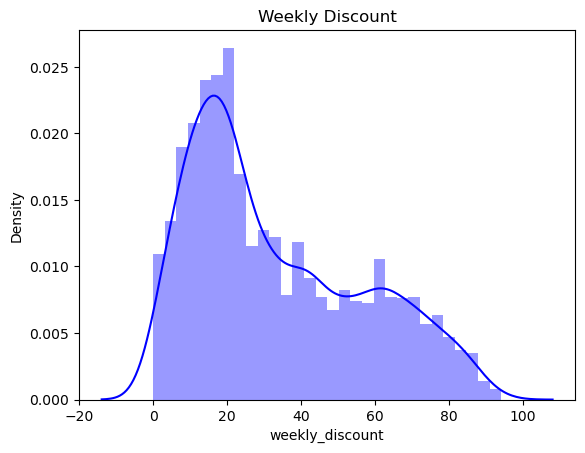

In [59]:
#plotting the weekly_discount column for better visualisation.

sns.distplot(lis[lis['weekly_discount'] >=0]['weekly_discount'],color='b', kde = True, bins= 30)
plt.title('Weekly Discount')

Our analysis reveals that a customer can anticipate **an average of 24.8% (~25%) discount** for a weekly rent, assuming that a one-time cleaning cost is applied if he rents a place for a week.There isn't much of a relationship between the neighbourhood and the weekly reductions a customer may negotiate for renting a property.

### Research Question 3 : Is there any trend in price and availablity throughout the year?


We will use calendar dataset to analyse the trend in price throughout the year and try to give possible reasons of occurings.

In [60]:
cal.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
9,241032,2016-01-13,t,85.0,1
10,241032,2016-01-14,t,85.0,1
14,241032,2016-01-18,t,85.0,1


In [61]:
#Encoding true, false as 0 and 1 in available column and validating the change.

cal['available'] = cal['available'].map(TF_encoding)
cal['available'].head()

0     1
1     1
9     1
10    1
14    1
Name: available, dtype: int64

In [62]:
#Checking how many listings are available using listing_id.

cal_avail = (cal.groupby('listing_id')['available'].
                         sum().reset_index())
cal_avail.head()

,listing_id,available
0,3335,309
1,4291,365
2,5682,309
3,6606,365
4,7369,53


In [63]:
### merging two data sets for the number of availabilities of each listing.
LisCalMerged = pd.merge(cal_avail, lis, left_on='listing_id', right_on= 'id')

availability_in_neighborhoods = LisCalMerged.groupby('neighbourhood_group_cleansed')['available'].mean().reset_index()
availability_in_neighborhoods.rename(columns = {'neighbourhood_group_cleansed': 'Neighborhood', 'available': 'Average Availibility' })

,Neighborhood,Average Availibility
0,Ballard,254.890351
1,Beacon Hill,260.948276
2,Capitol Hill,242.094891
3,Cascade,217.639535
4,Central Area,252.949721
5,Delridge,283.486842
6,Downtown,243.947573
7,Interbay,308.545455
8,Lake City,284.863636
9,Magnolia,282.754098


We will make another dataframe containing the listing available on particular date that will help us find the trend and unusual events if happening any meanwhile. We will extract the month and the week also if we need it in future analysis.

In [64]:
## get the number of listings available for each date
available_on_date = cal.groupby('date').sum()['available'].reset_index().sort_values(by='date')

available_on_date['date'] = pd.to_datetime(available_on_date['date'])

## get the month from the date column
available_on_date['month'] = available_on_date['date'].apply(lambda x: x.month)

## get week of the year from the date column
available_on_date['weekofyear'] = available_on_date['date'].apply(lambda x: x.week)

In [65]:
available_on_date.tail()

,date,available,month,weekofyear
360,2016-12-29,2835,12,52
361,2016-12-30,2840,12,52
362,2016-12-31,2859,12,52
363,2017-01-01,2922,1,52
364,2017-01-02,2776,1,1


Text(['2016-07-01'], 2250, 'Warmest month \nof the year')

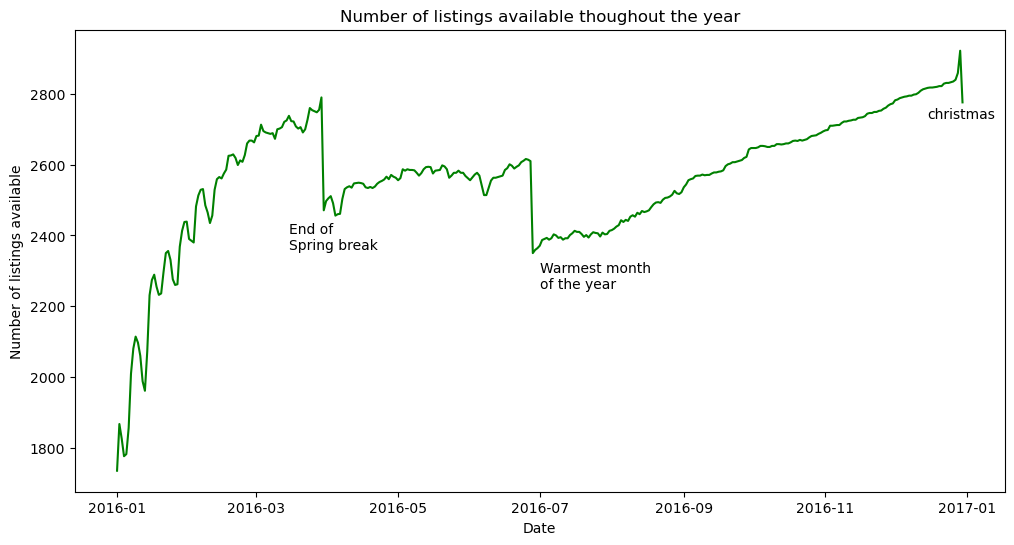

In [66]:
## plot the availability by date
plt.figure(figsize = (12,6))

plt.plot(pd.date_range(start='2016-01-01',end='2016-12-30'), 
        available_on_date.groupby('date').sum()['available'].values, color = 'green')
plt.ylabel('Number of listings available')
plt.xlabel('Date')
plt.title('Number of listings available thoughout the year')
plt.text(x = ['2016-12-15'] , y =2730, s= 'christmas') #The reason why I wrote 15 is because if I write 25 then the text will be printed outside the graph
plt.text(x = ['2016-03-15'] , y =2360, s = 'End of \nSpring break')
plt.text(x = ['2016-07-01'] , y =2250, s = 'Warmest month \nof the year')

- We can apparently notice the unusual changes 3 times in a year which are impacting the number of listings available in seattle. We took 15th March into cosideration first, that is when spring break gets over, and summer starts approaching, therefore people are likely to go for a tour. And that could be the reason of getting property pre-booked, resulting in less numbers of listings available across Seattle city.


- Other decline trend can be noticed somewhere around July month, heat could be the primary reason. People often prefer to stay in houses in hot summer and if they go for tour, they would want their accommodations to be pre-booked to stay out of reach of scorching heat.


- The last unusual trend shows a slight upsurge and then noticeable decline, Christmas could be the root cause. The surge can be noticed because hosts of properties usually try to list their all properties so that they can earn good money in the peak season of Christmas. The decline is caused by the heavy booking of the properties by customers in Christmas break. As soon as Christmas break gets over and Winter starts hitting, the number of listings again increases. 

Comparing the average price in month for only those listings that have all 12 month records for price.

In [67]:
price_month = cal.groupby(['listing_id', 'month'])['price'].mean()

price_month = price_month.dropna(axis= 0).reset_index()

all_month = price_month.groupby('listing_id').size() == 12

price_month = price_month[price_month['listing_id'].isin(all_month[all_month == True].index)]

price_month.groupby('month').mean()['price']

month
1     123.754969
2     126.038844
3     130.928573
4     134.687668
5     138.981651
6     148.045234
7     151.606332
8     150.607769
9     142.382591
10    135.956181
11    134.674365
12    136.362231
Name: price, dtype: float64

Text(0.5, 0, 'Months')

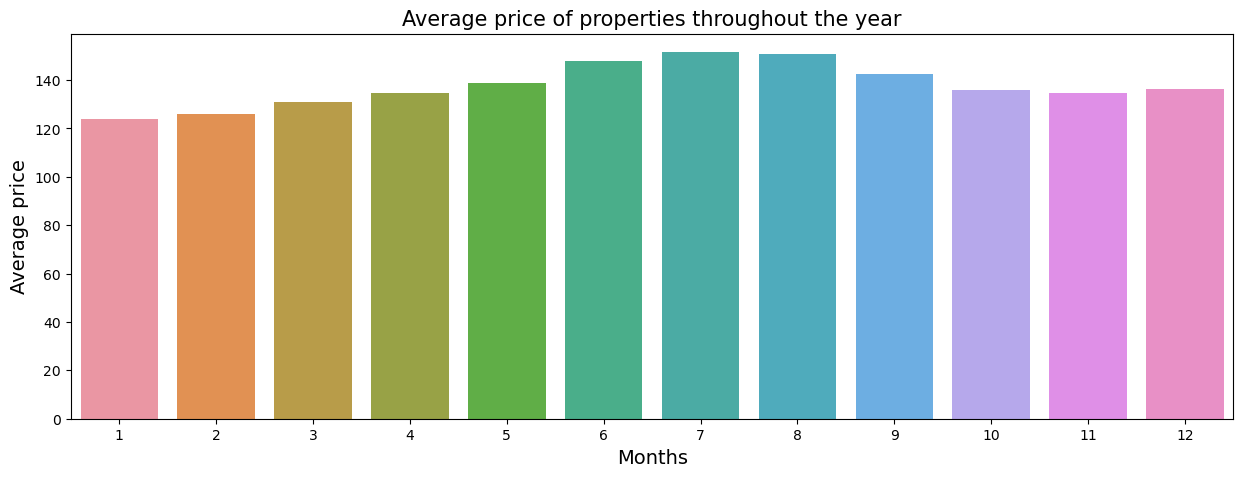

In [68]:
#Visualising the same output

plt.figure(figsize=(15,5))
sns.barplot(x = price_month.groupby('month').mean()['price'].index,
            y = price_month.groupby('month').mean()['price'])
plt.ylabel('Average price', fontsize= 14)
plt.title('Average price of properties throughout the year', fontsize=15)
plt.xlabel('Months', fontsize=14)

The Average price of properties has propensity of hike in summer,July and August being the most expensive months to live in.

Validating the same extracting weeks from the date.


Text(0.5, 0, 'Date')

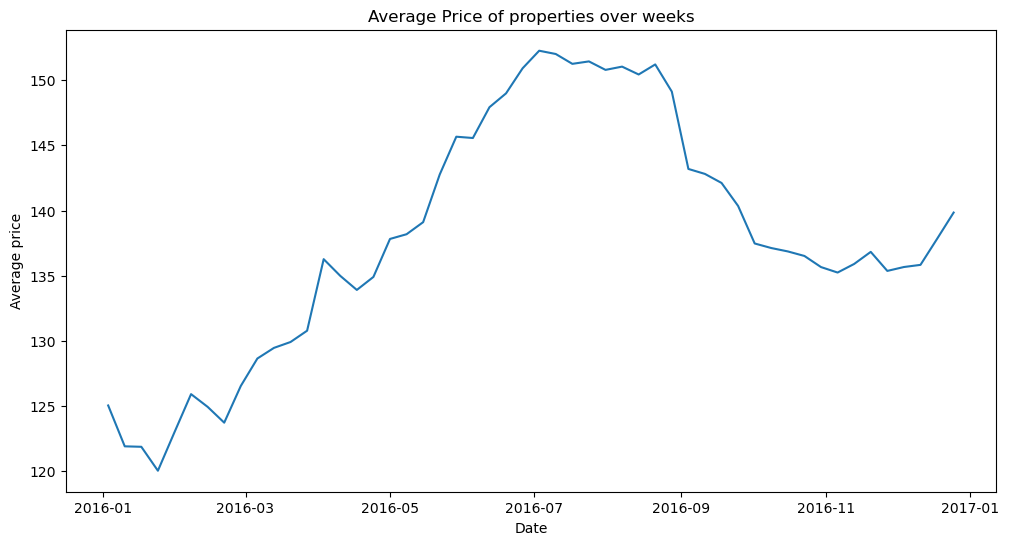

In [69]:
cal['week_of_year'] = pd.to_datetime(cal['date']).apply(lambda x: x.week)

price_by_date= cal.groupby('week_of_year').mean()['price']
price_by_date.dropna(inplace=True)
plt.figure(figsize=(12,6))
plt.plot(pd.date_range(start='2016-01-01',freq='W', periods= 52), price_by_date)
plt.title('Average Price of properties over weeks')
plt.ylabel('Average price')
plt.xlabel('Date')

In [70]:
price_by_date

week_of_year
1     125.039035
2     121.903215
3     121.867830
4     120.031291
5     122.987239
6     125.909441
7     124.931778
8     123.719378
9     126.536269
10    128.642743
11    129.458318
12    129.908919
13    130.777310
14    136.267039
15    134.985943
16    133.906150
17    134.904049
18    137.818596
19    138.180922
20    139.106589
21    142.764253
22    145.664591
23    145.564608
24    147.928591
25    148.990647
26    150.915601
27    152.263334
28    152.011396
29    151.256057
30    151.443711
31    150.792643
32    151.043085
33    150.439576
34    151.210800
35    149.125361
36    143.190617
37    142.808104
38    142.115745
39    140.349487
40    137.470347
41    137.120889
42    136.859947
43    136.512286
44    135.659950
45    135.240175
46    135.899435
47    136.826562
48    135.365143
49    135.664124
50    135.829195
51    137.821855
52    139.842865
Name: price, dtype: float64

From the results derived above, we can see that from the week 25 to week 35 (Start of July to the end of August) , the average prices of properties have been on the peak, hence former analysis matches with latter, validating our findings.

We also noticed that the number of properties available during these months were low, therefore we can see the upsurge in price because demand increased, and supply decreased.

### Bonus : What are the optimal features that are driving the property prices? And can we predict the price using those features? (Multivariate Analysis)

In [71]:
new_lis = lis.copy()

In [72]:
#Dropping unnecessary variables whose datatype is object.

new_lis = new_lis.drop(['listing_url', 'last_scraped','host_response_time', 'host_response_rate',\
                        'host_acceptance_rate', 'host_neighbourhood', 'host_verifications', 'city', 'state',\
                       'smart_location', 'country_code', 'country', 'calendar_last_scraped', 'jurisdiction_names',\
                       'reviews_per_month', 'amenities', 'host_id', 'host_listings_count', 'host_total_listings_count'], axis=1)

In [73]:
#changing the datatype of zipcode
new_lis['zipcode'] = new_lis['zipcode'].astype(int)

In [74]:
#Listing all the important categorical column

mylist = list(new_lis.select_dtypes(include=['O']).columns)
mylist

['neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy']

In [75]:
#Encoding categorical columns to the numeric columns

neighbourhood_map = {'Queen Anne': 0, 'Ballard': 1, 'Other neighborhoods':2, 'Cascade': 3, 'Central Area':4,\
                     'University District':5, 'Downtown':6, 'Magnolia':7, 'West Seattle':8, 'Interbay':9,\
                     'Beacon Hill':10, 'Rainier Valley':11, 'Delridge':12, 'Seward Park':13, 'Northgate':14,\
                     'Capitol Hill':15, 'Lake City':16}

propertyType_map ={'Apartment':1, 'House':2, 'Cabin':3,'Condominium':4, 'Camper/RV':5, 'Bungalow':6, 'Townhouse':7,\
                   'Loft':8, 'Boat':9, 'Bed & Breakfast':10, 'Other':11, 'Dorm':12, 'Treehouse':13, 'Yurt':14,\
                   'Chalet':15, 'Tent':16, 'nan':0}

roomType_map ={'Entire home/apt':0,'Private room':1, 'Shared room':2}

bedType_map ={'Real Bed':0, 'Futon':1, 'Pull-out Sofa':2, 'Airbed':3, 'Couch':4}

cancellation_map ={'stict':0, 'moderate':1, 'flexible':2}

In [76]:
#Applying mapping on columns 

new_lis['neighbourhood_group_cleansed'] = new_lis['neighbourhood_group_cleansed'].map(neighbourhood_map)
new_lis['property_type'] = new_lis['property_type'].map(propertyType_map)
new_lis['room_type'] = new_lis['room_type'].map(roomType_map)
new_lis['bed_type'] = new_lis['bed_type'].map(bedType_map)
new_lis['cancellation_policy'] = new_lis['cancellation_policy'].map(cancellation_map)

We are going to perform linear regression. therefore we need to scale the features. We will use StandardScalar to scale the features.

In [77]:
from sklearn.preprocessing import StandardScaler

lis_columns = new_lis.columns
features = new_lis[lis_columns]

std = StandardScaler().fit(features.values)
std_features = std.transform(features.values)
norm_lis = pd.DataFrame(std_features, columns = lis_columns)
norm_lis.head()

,id,scrape_id,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,weekly_price,monthly_price,cleaning_fee,guests_included,extra_people_price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,security_deposit_Y/N,number_of_amenities,number_of_verifications,host_active_years,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,price_per_accomodation,weekly_discount
0,-1.791898,0.0,-0.506053,0.042869,0.522755,-1.259445,-0.001803,0.170046,-1.194751,0.345053,-0.552263,-0.674666,0.328625,-0.427598,-0.346217,-0.645191,-0.185597,-0.475978,-0.458326,-0.618900,-0.903153,0.249438,-0.322229,-0.083993,-0.246805,0.0,-0.228934,0.179262,0.379150,0.798108,4.896718,0.457451,0.547345,0.565514,0.507950,0.499449,0.282590,0.597680,0.0,-0.428084,-0.958749,-0.303060,-0.330121,-0.160737,-0.978224,-0.928398,-0.575766,1.349648,-0.430652,1.715269,-0.89253,-0.098949,-0.045835,-0.058467,-0.074388,-0.058467,-0.022899,-0.156299,-0.022899,-0.912126,-0.102923,-0.076149,-0.036221,-0.178631,-0.02805,-0.01619,-0.660868,-0.177849,-0.058467,-0.140625,-0.11167,0.209879,1.432760,-0.768546,-0.968926,0.173634
1,-1.551308,0.0,1.976078,0.042869,0.522755,-1.259445,-0.001803,0.235868,-1.025954,0.345053,-0.552263,-0.674666,0.328625,-0.427598,-0.346217,-0.645191,-0.185597,0.244331,0.906753,1.169909,-0.101774,-0.513268,-0.606548,-0.022673,-0.410130,0.0,-0.311094,-1.020850,-1.235982,0.364024,0.550321,0.485276,0.547345,0.565514,0.507950,0.499449,0.555524,0.597680,0.0,-0.428084,NaN,3.299674,3.029191,0.517961,1.022260,0.346743,1.140736,0.388145,-0.430652,-0.582999,1.12041,-0.098949,-0.045835,-0.058467,-0.074388,-0.058467,-0.022899,-0.156299,-0.022899,-0.912126,-0.102923,-0.076149,-0.036221,-0.178631,-0.02805,-0.01619,-0.660868,-0.177849,-0.058467,-0.140625,-0.11167,0.209879,-0.697954,1.301158,-0.181391,-0.521885
2,-0.756035,0.0,-0.506053,0.042869,0.522755,-1.259445,-0.001803,0.017574,-1.146178,0.345053,-0.018063,-0.674666,3.868239,5.457000,4.178319,4.619345,-0.185597,9.386719,-0.458326,-0.618900,5.107191,6.351088,0.815049,0.099966,-0.445765,0.0,-1.297020,-1.320878,-1.206616,-0.196339,-0.059235,0.513101,0.547345,0.565514,0.507950,0.499449,0.555524,0.597680,0.0,-0.428084,NaN,-0.303060,-0.330121,-0.160737,1.022260,1.409360,0.282485,-0.445157,-0.430652,1.715269,-0.89253,-0.098949,-0.045835,-0.058467,-0.074388,-0.058467,-0.022899,-0.156299,-0.022899,1.096340,-0.102923,-0.076149,-0.036221,-0.178631,-0.02805,-0.01619,-0.660868,-0.177849,-0.058467,-0.140625,-0.11167,0.209879,-0.697954,1.301158,2.296865,2.186990
3,0.632677,0.0,-0.506053,0.042869,0.522755,-1.259445,-0.001803,0.220773,-1.139750,0.345053,-0.552263,-0.674666,-0.177034,-0.427598,-1.477351,0.232232,-0.185597,-0.309753,0.090589,0.752520,-0.903153,-0.513268,-0.606548,-0.083993,0.204568,0.0,-1.379180,-1.578045,-1.705838,-0.804056,-0.589283,-2.185930,-2.162046,-2.161302,-2.171531,-2.187564,-2.173818,-2.159510,0.0,-0.428084,1.043026,-0.303060,-0.330121,-0.330412

In [78]:
#Declaring features and labels.

X= norm_lis.drop(['price', 'weekly_price', 'monthly_price', 'cleaning_fee', 'weekly_discount', 'price_per_accomodation'], axis=1)
y = norm_lis.price

In [79]:
#We spot null values in the property_type, and cancellation_policy column, will impute them with mode.
X['property_type'].fillna(X['property_type'].mode()[0], inplace=True)
X['cancellation_policy'].fillna(X['cancellation_policy'].mode()[0], inplace=True)

In [80]:
#Splitting the dataset into training and testing set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [81]:
#Applying Mutual information to select the best 15 features which are driving the property prices

score_function = partial(mutual_info_regression)
select = SelectKBest(score_function, k=15)
feature_train_transformed = select.fit_transform(X_train,y_train)
feature_test_transformed = select.fit_transform(X_test,y_test)

In [82]:
# Updating the dataframe based on the new feature list

cols = select.get_support(indices=True)
X_train_new = X_train.iloc[:,cols]
X_test_new = X_test.iloc[:,cols]

In [83]:
# Getting the raw score for each feature, we use '-' to sort the array in descending order

scores = -np.sort(-select.scores_)
top15_scores = scores[:15]

In [84]:
#Optimal 15 features list
opt_features = list(X_train_new.columns)

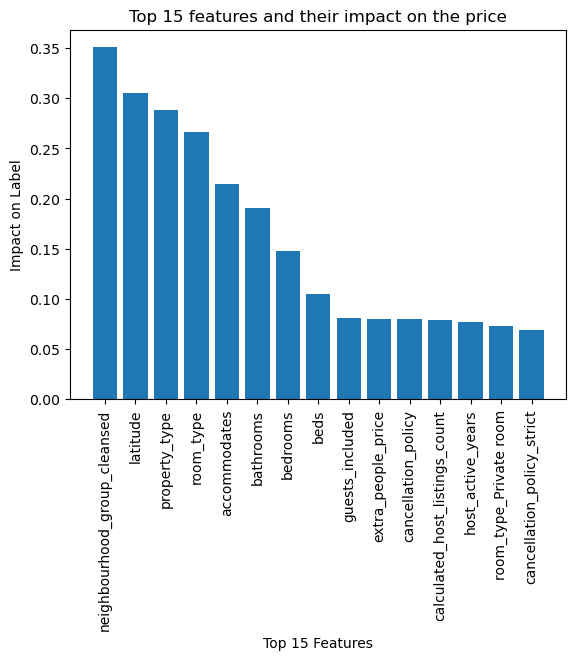

In [85]:
# Plotting top 15 features and their impact on the price

plt.bar(range(len(opt_features)), top15_scores)
plt.xticks(range(len(opt_features)), opt_features, rotation='vertical')
plt.ylabel('Impact on Label')
plt.xlabel('Top 15 Features')
plt.title('Top 15 features and their impact on the price', fontsize=12)
plt.show()

We have done multivariate analysis to select the best 15 features which are highly impacting the price of the property listed in the Seattle city. As we have done detailed analysis on the neighbourhood in question 1, we can see the same impact here, neighbourhood_group_cleansed being the most contributing factor to drive the price. We have also got the findings on Seattle city map in previous analysis, and here we get the same, location (latitude, longitude) being the second most contributing factor. Property type, room type, number of bathrooms, etc. can usually be noticed in real life that those features can impact the price of any property, and our analysis is showing the same. 

Now let's try to predict the price using linear regression algorithm.

In [86]:
lr = LinearRegression(normalize=True)
# Fit the model to the train data set
lr.fit(X_train_new, y_train)
# Predict using test data set
y_pred = lr.predict(X_test_new)

Text(0.5, 1.0, 'Relation between Actual Price and Predicted Price')

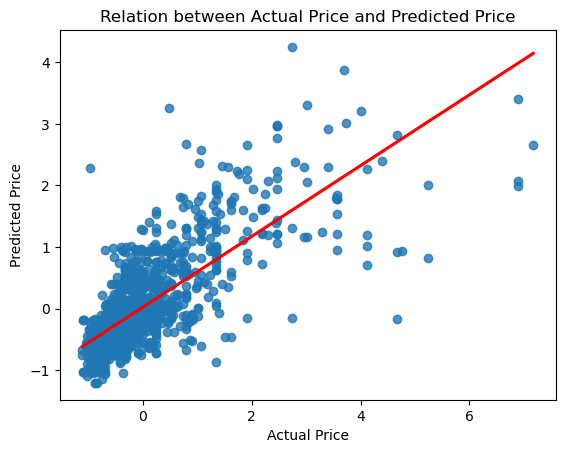

In [87]:
sns.regplot(y_test, y_pred, ci=None, line_kws={"color": "red"})
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Relation between Actual Price and Predicted Price')

As we can see from the scatterplot shown above that, Actual price and predicted price has positive correlation which shows that our model is not overfitting and we are able to predict the price of listed properties in the Seattle City.

<a id='conclusions'></a>
## Conclusions

- Aggomerating all the points and analysis we have done so far, we can conclude that -

    - Seattle is one of the most expensive cities in the world to travel. There are numerous factors associated with the cost of living in that city. Leasing a property in the city could be expensive, especially if we consider some localities/neighbourhood. Our analysis shows that Capitol Hill, Cascade, Downtown, Interbay, and Queen Anne are the most expensive neighbourhoods to rent a property because they are mainly located in the central Seattle.
    
    - Majority of Apartments are listed in the most expensive neighbourhoods, making it one of the most expensive property type to live in. However, it is not the most expensive property type. Boat is the costiest property type to lease for obvious reasons.
    
    - It is likely possible that hosts can give discount to those who lease the property for longer time, therefore we calculated the discount that hosts might offer customers who leases the property for a week instead of just one night. And our assumptions based on our research says that hosts are likely to give around 25% of discount if customers book the property for a week.
    
    - Number of available listings varies throughout the year and that is obvious. We have spotted a significant occurance while plotting the number of listings available throughtout the year. The properties ran out in numbers as soon as summer started. The number of available property also declined in the month of July and during the Christmas break.
    
    - In the summer, demand for the properties increased, therefore price also hiked. July and August were the most expensive months to lease the property.
    
    - As mentioned earlier that there could be various factors which can affect the cost of living and cost of rental properties in Seattle city, our analysis unfolds the contributing features which are impacting the price. Neighbourhood, location, property type, room type are some of them.

    - Retreiving all the inputs, we are able to predict the price of the property, and when we do so, we compared the predicted price with the actual price that is giving positive correlation, meaning that our analysis can also be useful in predicting price upto some extent.


**Limitation :** The reviews received from customers can be read and understood easily by any person but when it comes to analysis, the sentimental analysis could be the point where we can lack of the actual senses and sentiments customers are feeling. Nowadays, GPT-3 has worked over sentimental analysis agressively, yet it is not fully developed. Moreover, analysis of such could be complex and expensive for the tourism industry, thus being the limitation.

_______________________________________________________________________________________________________________________________

**Project by :** Kishan Kanaiyalal Patel 

**Student ID :** 200527734

**AIDI 1004  :** Issue and Challenges in AI

**Instructor :** Katie Tiwari

**Due Date   :** November 28, 2022.



_______________________________________________________________________________________________________________________________